In [49]:
%reload_ext nb_black

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AgglomerativeClustering,
)
from sklearn.mixture import GaussianMixture

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA

In [3]:
# the data set contains stats 10 min into diamond ranked games (~10k)
# data obtained from https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min
lol = pd.read_csv("high_diamond_ranked_10min.csv")
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


<IPython.core.display.Javascript object>

In [4]:
### Drop all red columns, focus solely on blue side.
blue_lol = lol[lol.columns.drop(list(lol.filter(regex="red")))]
blue_lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,0,12,1,0,5,5,5,0,0,...,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


<IPython.core.display.Javascript object>

In [5]:
# Eye balling the data, there are columns that are not necessary or redundant and can be dropped
# Able to get rid of these columns because there is another column of totals. Therefore by minute is unnecessary
blue_lol = blue_lol.drop(
    columns=[
        "gameId",
        "blueGoldPerMin",
        "blueGoldDiff",
        "blueCSPerMin",
        "blueAvgLevel",
        "blueExperienceDiff",
    ]
)

<IPython.core.display.Javascript object>

In [6]:
# Checking for any missing values within the dataset
# There does not appear to be any missing values in the data set.
blue_lol.isna().mean()

blueWins                        0.0
blueWardsPlaced                 0.0
blueWardsDestroyed              0.0
blueFirstBlood                  0.0
blueKills                       0.0
blueDeaths                      0.0
blueAssists                     0.0
blueEliteMonsters               0.0
blueDragons                     0.0
blueHeralds                     0.0
blueTowersDestroyed             0.0
blueTotalGold                   0.0
blueTotalExperience             0.0
blueTotalMinionsKilled          0.0
blueTotalJungleMinionsKilled    0.0
dtype: float64

<IPython.core.display.Javascript object>

In [7]:
# Making sure the data is numeric
blue_lol.dtypes

blueWins                        int64
blueWardsPlaced                 int64
blueWardsDestroyed              int64
blueFirstBlood                  int64
blueKills                       int64
blueDeaths                      int64
blueAssists                     int64
blueEliteMonsters               int64
blueDragons                     int64
blueHeralds                     int64
blueTowersDestroyed             int64
blueTotalGold                   int64
blueTotalExperience             int64
blueTotalMinionsKilled          int64
blueTotalJungleMinionsKilled    int64
dtype: object

<IPython.core.display.Javascript object>

In [8]:
# not enough information, I chose to only keep data from 1 and 0 tower kills, which will also place this in bin_cols
blue_lol["blueTowersDestroyed"].value_counts()

0    9415
1     429
2      27
3       7
4       1
Name: blueTowersDestroyed, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
tower_counts = blue_lol["blueTowersDestroyed"].value_counts()
keep = tower_counts[tower_counts > 400].index
blue_lol = blue_lol[blue_lol["blueTowersDestroyed"].isin(keep)]

<IPython.core.display.Javascript object>

# Clustering

I will be performing 3 dimensionality reduction methods (PCA, t-SNE, UMAP) on 4 clustering methods (KMeans, DBSCAN, Agglomerative, GMM).

First I will apply PCA to the 4 different methods. Since I am applying PCA it is important to scale and standardize the data.

In [12]:
scaler = StandardScaler()
X_std = scaler.fit_transform(blue_lol)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Applying PCA to the Data

In [15]:
# Computing the principal components
pca = PCA()
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
pca.explained_variance_ratio_

array([2.63615377e-01, 1.39023505e-01, 1.09399601e-01, 7.60729176e-02,
       6.90720604e-02, 6.70107832e-02, 6.28352930e-02, 5.41898004e-02,
       5.00583999e-02, 4.74944385e-02, 3.34762755e-02, 1.73887245e-02,
       8.17474884e-03, 2.18807605e-03, 4.56760035e-33])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# I plan to use the amount of components that add up to 90% variance.
n_components = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.90)
X_pca = X_pca[:, :n_components]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# check to see the amount of components being used
# it appears 9 out of the 15 features add up to 90% variance
n_components

9

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

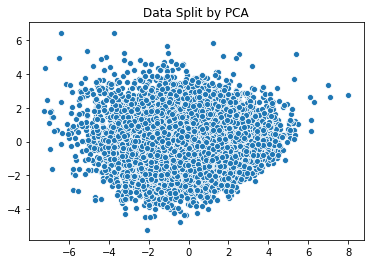

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# adding a scatterplot to visualize how the data was split using PCA
# just eyeballing the plot there does not appear to be any noticeable clusters.
# curious to see how each clustering method will split the data.
sns.scatterplot(X_pca[:, 0], X_pca[:, 1])
plt.title("Data Split by PCA")
plt.show()

## Applying KMeans to the Data

To keep cluster results consistant I am applying a random state of 13 so when I close the notebook and come back to it at later times my results will remain the same. I am choosing to create 3-10 clusters and compare those results.

In [34]:
for c in range(3, 11):
    km = KMeans(n_clusters=c, random_state=13)
    km.fit(X_pca)
    labels = km.fit_predict(X_pca)
    print(
        f"The Silhouette Score for {c} clusters: "
        + str(metrics.silhouette_score(X_pca, labels, metric="euclidean"))
    )

The Silhouette Score for 3 clusters: 0.17751553632732925
The Silhouette Score for 4 clusters: 0.174171320226354
The Silhouette Score for 5 clusters: 0.17591190406998541
The Silhouette Score for 6 clusters: 0.1585760284556778
The Silhouette Score for 7 clusters: 0.1640629407248322
The Silhouette Score for 8 clusters: 0.16455040798973974
The Silhouette Score for 9 clusters: 0.17027904442946798
The Silhouette Score for 10 clusters: 0.16287427847191216


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It appears KMeans with PCA and 3 clusters provides the best silhouette score of around 0.178. 

*Note: This score is relatively low.*

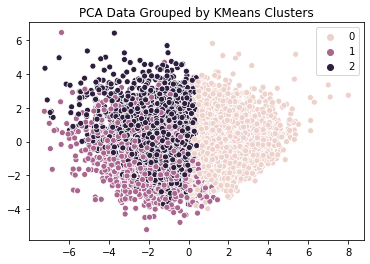

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
# Interesting to visualize how KMeans clusters the PCA data. (Using the K that resulted in highest Silhouette Score)
km = KMeans(n_clusters=3, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters")
plt.show()

## Applying DBSCAN to the Data

In [48]:
for e in (1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5):
    db = DBSCAN(eps=e)
    clusters = db.fit_predict(X_pca)
    print(
        "The number of clusters when epsilon = {} is: {} ".format(
            e, len(np.unique(clusters))
        )
    )
    print(str(len(np.unique(clusters))) + " cluster score: ")
    print(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))

The number of clusters when epsilon = 1 is: 26 
26 cluster score: 
-0.13906358366571828
The number of clusters when epsilon = 1.5 is: 14 
14 cluster score: 
0.14739303978293924
The number of clusters when epsilon = 2 is: 10 
10 cluster score: 
0.17724452791750125
The number of clusters when epsilon = 2.5 is: 7 
7 cluster score: 
0.1852872463222325
The number of clusters when epsilon = 3 is: 3 
3 cluster score: 
0.3555809507181026
The number of clusters when epsilon = 3.5 is: 3 
3 cluster score: 
0.35767014679235165
The number of clusters when epsilon = 4 is: 3 
3 cluster score: 
0.35815449702653096
The number of clusters when epsilon = 4.5 is: 3 
3 cluster score: 
0.35896084731457545
The number of clusters when epsilon = 5 is: 2 
2 cluster score: 
0.5470454920663432


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For DBSCAN I chose to only manipulate epsilon and leave the min samples alone. To my surprise, the Silhouette Scores obtained from this clustering method was much better than the other methods tested so far. The best epsilon is 5 and results in 2 clusters. This gives a Silhouette Score of 0.547.

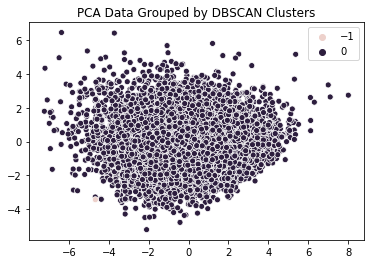

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
db = DBSCAN(eps=5)
clusters = db.fit_predict(X_pca)
sns.scatterplot(
    X_pca[:, 0], X_pca[:, 1], hue=clusters,
)
plt.title("PCA Data Grouped by DBSCAN Clusters")
plt.show()

## Applying Agglomerative Clustering to the Data

For Agglomerative clustering since there are three ways to determine linkage (complete, average, ward), I will be creating 3-10 clusters for each of the three distance measurements.

In [40]:
for c in range(3, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="complete", affinity="cosine", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_pca)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is: "
        + str(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))
    )

The Silhouette Score for 3 clusters is: 0.09001934310702729
The Silhouette Score for 4 clusters is: 0.11991539369910201
The Silhouette Score for 5 clusters is: 0.06609544253693514
The Silhouette Score for 6 clusters is: 0.04219258073056444
The Silhouette Score for 7 clusters is: 0.04612100051727293
The Silhouette Score for 8 clusters is: 0.04484446937320177
The Silhouette Score for 9 clusters is: 0.07202883401986299
The Silhouette Score for 10 clusters is: 0.07641897618938209


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="average", affinity="cosine", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_pca)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.16184144774615958
The Silhouette Score for 5 clusters is:0.1233482760822222
The Silhouette Score for 6 clusters is:0.15308406440632782
The Silhouette Score for 7 clusters is:0.14755885940473779
The Silhouette Score for 8 clusters is:0.14559854853705745
The Silhouette Score for 9 clusters is:0.13021519019954858
The Silhouette Score for 10 clusters is:0.11995913423793382


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="ward", affinity="euclidean", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_pca)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.1532527334233306
The Silhouette Score for 5 clusters is:0.17018040774754256
The Silhouette Score for 6 clusters is:0.16115705352567145
The Silhouette Score for 7 clusters is:0.1467820637214655
The Silhouette Score for 8 clusters is:0.14834859009156706
The Silhouette Score for 9 clusters is:0.11438776227717598
The Silhouette Score for 10 clusters is:0.1182766085820967


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After comparing the results it is clear Agglomerative Clustering with 5 clusters and ward linkage provides the best Silhouette Score of 0.170.

*Note: this score is still relatively low*

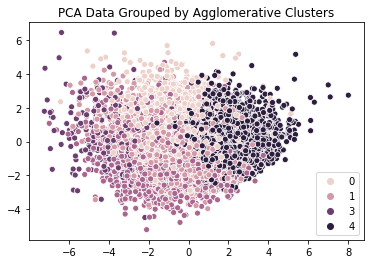

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
agg_clstr = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=5)
clusters = agg_clstr.fit_predict(X_pca)
sns.scatterplot(
    X_pca[:, 0], X_pca[:, 1], hue=clusters,
)
plt.title("PCA Data Grouped by Agglomerative Clusters")
plt.show()

## Applying Gaussian Mixture Model to the Data

In [50]:
for c in range(3, 11):
    gauss = GaussianMixture(n_components=c, random_state=13)
    clusters = gauss.fit_predict(X_pca)
    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))
    )

The Silhouette Score for 3 clusters is:0.1798293947077883
The Silhouette Score for 4 clusters is:0.16079053875207625
The Silhouette Score for 5 clusters is:0.15205186132718806
The Silhouette Score for 6 clusters is:0.14363874566492935
The Silhouette Score for 7 clusters is:0.12459468379358489
The Silhouette Score for 8 clusters is:0.13164980603507287
The Silhouette Score for 9 clusters is:0.1197192990338002
The Silhouette Score for 10 clusters is:0.10165722263946232


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The best Silhouette Score comes from GMM with 3 clusters. The score is around 0.180, which is slightly better than KMeans and Agglomerative clustering, but still a pretty low score compared to DBSCAN.

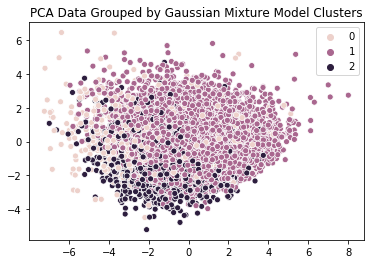

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
gauss = GaussianMixture(n_components=3, random_state=13)
clusters = gauss.fit_predict(X_pca)

sns.scatterplot(
    X_pca[:, 0], X_pca[:, 1], hue=clusters,
)
plt.title("PCA Data Grouped by Gaussian Mixture Model Clusters")
plt.show()

Comparing all of the clustering methods best scores, we see when applying PCA to the data DBSCAN has the best Silhouette score by a long shot (0.547).